In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from plotnine import ggplot, aes, geom_point, labs
from scipy.stats import linregress


# Multicollinearity Demo

In [2]:

### multicollinearity

# Uncorrelated predictor variables
X1 = [4, 4, 4, 4, 6, 6, 6, 6]
X2 = [2, 2, 3, 3, 2, 2, 3, 3]
Y = [42, 39, 48, 51, 49, 53, 61, 60]


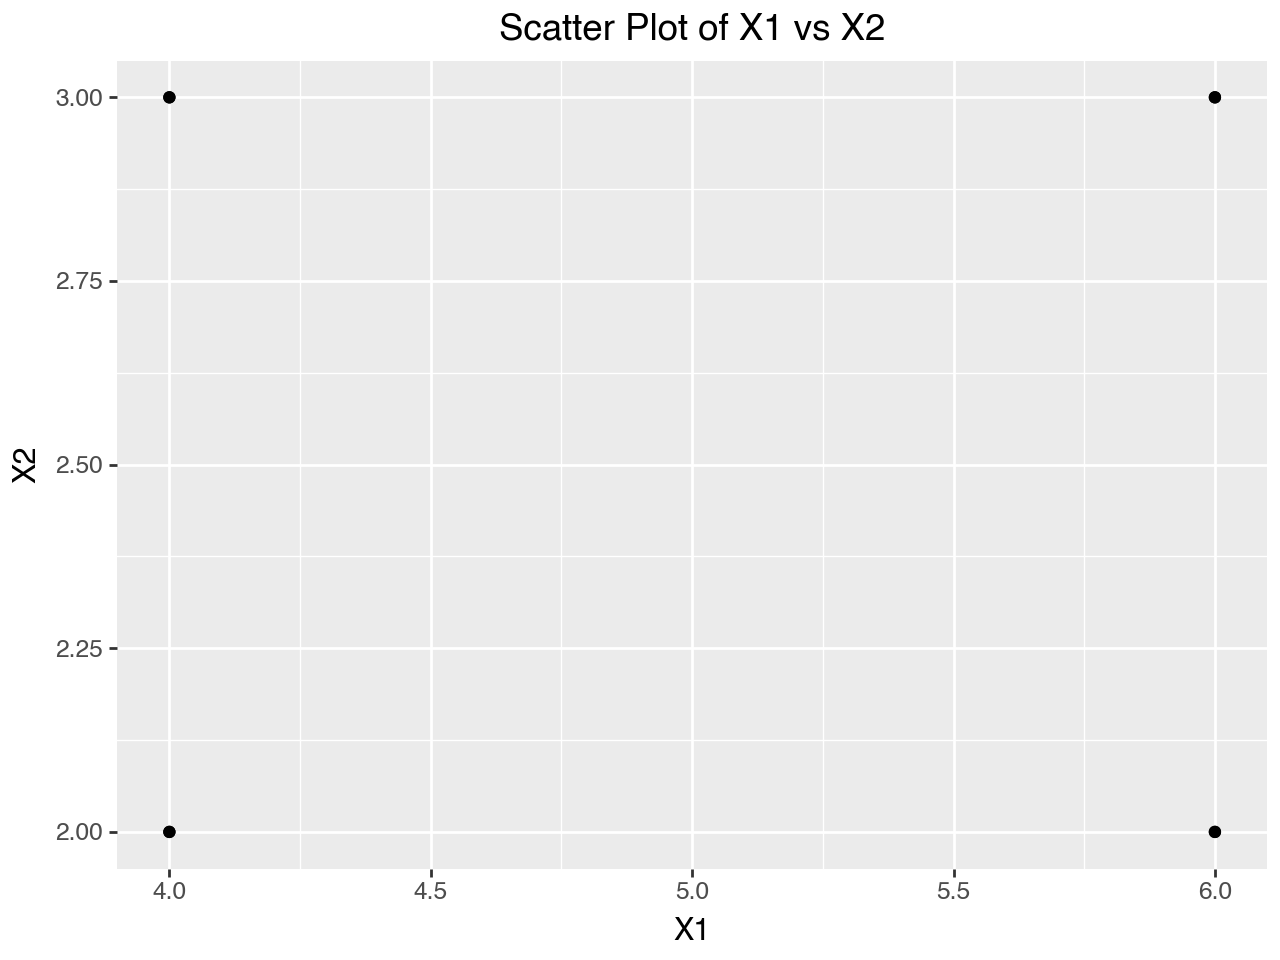

In [3]:

# Creating DataFrame 
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Plot X1 vs X2
plot = (ggplot(df, aes(x='X1', y='X2')) +
        geom_point() +
        labs(x='X1', y='X2', title='Scatter Plot of X1 vs X2'))
plot

In [4]:

# Correlation between X1 and X2
correlation = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation}')

Correlation between X1 and X2: 0.0


In [5]:

# Linear model Y ~ X1 + X2
model1 = ols('Y ~ X1 + X2', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     57.06
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           0.000361
Time:                        14:16:04   Log-Likelihood:                -14.511
No. Observations:                   8   AIC:                             35.02
Df Residuals:                       5   BIC:                             35.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3750      4.740      0.079      0.940     -11.811      12.561
X1             5.3750      0.664      8.097      0.000       3.669       7.081
X2             9.2500      1.328      6.968      0.001       5.837      12.663
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   2.773
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                0.878
Skew:                          -0.108   Prob(JB):                        0.645
Kurtosis:                       1.391   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Linear model Y ~ X1
model_X1 = ols('Y ~ X1', data=df).fit()
model_X1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     7.347
Date:                Mon, 22 Sep 2025   Prob (F-statistic):             0.0351
Time:                        14:16:04   Log-Likelihood:                -23.995
No. Observations:                   8   AIC:                             51.99
Df Residuals:                       6   BIC:                             52.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5000     10.111      2.324      0.059      -1.242      48.242
X1             5.3750      1.983      2.711      0.035       0.523      10.227
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                0.935
Skew:                          -0.117   Prob(JB):                        0.626
Kurtosis:                       1.341   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Linear model Y ~ X2
model_X2 = ols('Y ~ X2', data=df).fit()
model_X2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     4.128
Date:                Mon, 22 Sep 2025   Prob (F-statistic):             0.0885
Time:                        14:16:04   Log-Likelihood:                -25.100
No. Observations:                   8   AIC:                             54.20
Df Residuals:                       6   BIC:                             54.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2500     11.608      2.348      0.057      -1.153      55.653
X2             9.2500      4.553      2.032      0.088      -1.891      20.391
==============================================================================
Omnibus:                        4.296   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                1.012
Skew:                          -0.008   Prob(JB):                        0.603
Kurtosis:                       1.257   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# ANOVA for both models
from statsmodels.stats.anova import anova_lm

anova_results1 = anova_lm(model1)
anova_results1

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,231.125,231.125,65.567376,0.000466
X2,1.0,171.125,171.125,48.546099,0.000937
Residual,5.0,17.625,3.525,NaN,NaN


In [9]:
anova_results_X1 = anova_lm(model_X1)
anova_results_X1

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,231.125,231.125000,7.34702,0.035081
Residual,6.0,188.750,31.458333,NaN,NaN


In [10]:
anova_results_X2 = anova_lm(model_X2)
anova_results_X2

,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,171.125,171.125000,4.127638,0.08846
Residual,6.0,248.750,41.458333,NaN,NaN


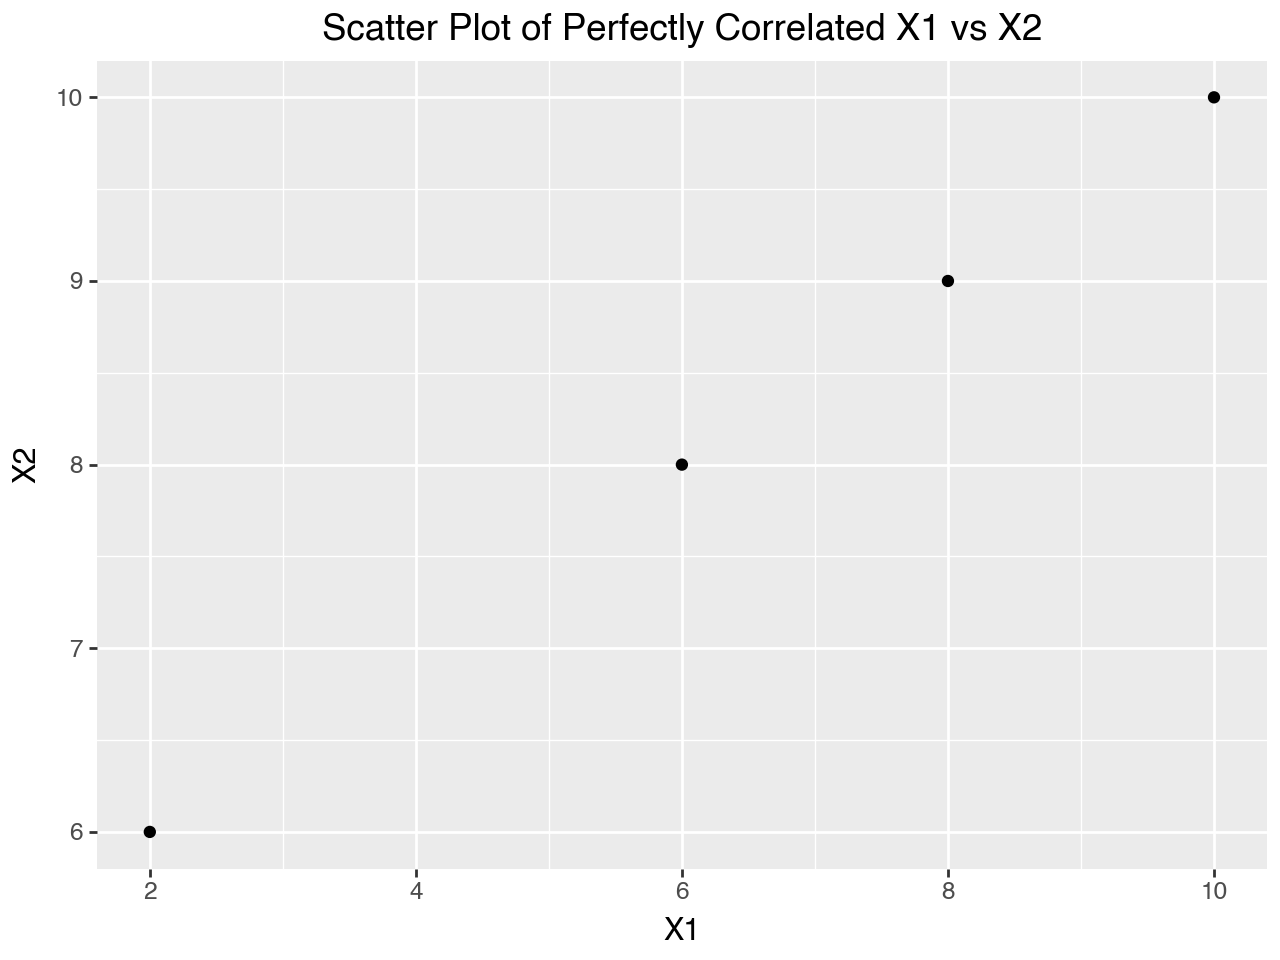

In [11]:
# Perfectly correlated case
X1 = [2, 8, 6, 10]
X2 = [6, 9, 8, 10]
Y = [23, 83, 63, 103]

df_perfect = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Plot X1 vs X2
plot_perfect = (ggplot(df_perfect, aes(x='X1', y='X2')) +
                geom_point() +
                labs(x='X1', y='X2', title='Scatter Plot of Perfectly Correlated X1 vs X2'))
plot_perfect

In [12]:
# Correlation between X1 and X2
correlation_perfect = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation_perfect}')

Correlation between X1 and X2: 1.0


In [13]:
X = np.column_stack([np.ones(len(X1)), X1, X2])
X

array([[ 1.,  2.,  6.],
       [ 1.,  8.,  9.],
       [ 1.,  6.,  8.],
       [ 1., 10., 10.]])

In [14]:
# Matrix operations

XtX = np.dot(X.T, X)
print(f'XtX Matrix:\n{XtX}')

XtX Matrix:
[[  4.  26.  33.]
 [ 26. 204. 232.]
 [ 33. 232. 281.]]


In [15]:
# Eigenvalues
eigenvalues = np.linalg.eigvals(XtX)
print(f'Eigenvalues:\n{eigenvalues}') #2nd eigen val very close to zero !!!! 
#numerically near singular
#this is going to be an issue for us:

Eigenvalues:
[4.81365468e+02 7.42814262e-17 7.63453185e+00]


In [16]:
import scipy.linalg as spla

# Attempt to invert the matrix
XtX_inv = spla.solve(XtX, np.eye(3))
print(f'Inverse of XtX:\n{XtX_inv}')

#it blows up and gives you a warning on the "Condition Number" of the matrix 

Inverse of XtX:
[[ 1.99568144e+16  1.99568144e+15 -3.99136289e+15]
 [ 1.99568144e+15  1.99568144e+14 -3.99136289e+14]
 [-3.99136289e+15 -3.99136289e+14  7.98272577e+14]]


/var/folders/z7/kfsx1fbn63n3v7ltt_8lw1gr0000gn/T/ipykernel_37688/3933071815.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=7.05948e-20): result may not be accurate.


In [17]:
#the warning is basically telling you the result is nonsense. Sanity check! 

In [18]:
XtX_inv @ XtX # this is not the identity.... cry

array([[ 15.   ,  24.   ,  -9.   ],
       [  0.125,  13.   ,   1.125],
       [ -4.5  , -20.   , -40.5  ]])

In [19]:
#If you use np.linalg.inv ... it doesn't do the float calcs exactly and will actually let you invert a singular matrix... watch out! 
np.linalg.inv(XtX)

# Interesting discussion of the issue: https://github.com/numpy/numpy/issues/2074

array([[-4.56937087e+15, -4.56937087e+14,  9.13874175e+14],
       [-4.56937087e+14, -4.56937087e+13,  9.13874175e+13],
       [ 9.13874175e+14,  9.13874175e+13, -1.82774835e+14]])

In [20]:
# Linear model Y ~ X1 + X2
model1 = ols('Y ~ X1 + X2', data=df_perfect).fit()
model1.summary()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.273e+30
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.40e-31
Time:                        14:16:04   Log-Likelihood:                 119.19
No. Observations:                   4   AIC:                            -234.4
Df Residuals:                       2   BIC:                            -235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8095   2.84e-15  -2.85e+14      0.000      -0.810      -0.810
X1             9.6190   1.08e-14   8.88e+14      0.000       9.619       9.619
X2             0.7619   8.91e-15   8.55e+13      0.000       0.762       0.762
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.082
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.419
Skew:                           0.652   Prob(JB):                        0.811
Kurtosis:                       2.097   Cond. No.                     8.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  7e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
model1 = ols('Y ~ X1', data=df_perfect).fit()
model1.summary()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.386e+32
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           7.21e-33
Time:                        14:16:04   Log-Likelihood:                 127.41
No. Observations:                   4   AIC:                            -250.8
Df Residuals:                       2   BIC:                            -252.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0000   6.06e-15   4.95e+14      0.000       3.000       3.000
X1            10.0000   8.49e-16   1.18e+16      0.000      10.000      10.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.963
Skew:                          -1.155   Prob(JB):                        0.618
Kurtosis:                       2.333   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model1 = ols('Y ~ X2', data=df_perfect).fit()
model1.summary()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.628e+29
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.04e-30
Time:                        14:16:04   Log-Likelihood:                 117.47
No. Observations:                   4   AIC:                            -230.9
Df Residuals:                       2   BIC:                            -232.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.0000   1.71e-13  -5.68e+14      0.000     -97.000     -97.000
X2            20.0000   2.04e-14   9.81e+14      0.000      20.000      20.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         48.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factors - VIFs

In [23]:
# Variance Inflation - generating new data
np.random.seed(0)
X1 = np.random.uniform(25, 50, 100)
X2 = np.random.normal(10, 3, 100)
eps = np.random.normal(0, 4, 100)

df_vif = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': 7 + 3 * X1 + 5 * X2 + eps
})

# Correlation between X1 and X2
correlation_X1_X2 = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation_X1_X2}')

Correlation between X1 and X2: -0.01824782721587361


In [24]:
# Linear model with X1 and X2
mod1 = ols('Y ~ X1 + X2', data=df_vif).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2193.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.82e-81
Time:                        14:16:04   Log-Likelihood:                -277.67
No. Observations:                 100   AIC:                             561.3
Df Residuals:                      97   BIC:                             569.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9068      2.505      2.358      0.020       0.934      10.880
X1             2.9676      0.055     54.178      0.000       2.859       3.076
X2             5.1591      0.132     39.062      0.000       4.897       5.421
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif_model_X1o = ols('X1 ~ X2', data=df_vif).fit()
r2j_X1o = vif_model_X1o.rsquared
vif_j_x1 = 1/(1-r2j_X1o)
print(f'VIF for X1: {vif_j_x1}')

VIF for X1: 1.0003330941128432


### VIF Close to 1 indicates not very much multicollinearity between X1 and other predictors.

### On the other hand...

In [26]:

# Creating a nearly perfectly collinear variable X3
df_vif['X3'] = 2 * df_vif['X1'] + 3 * df_vif['X2'] + np.random.normal(0, 0.01, 100)

correlation_X1_X3 = np.corrcoef(df_vif['X1'], df_vif['X3'])[0, 1]
correlation_X2_X3 = np.corrcoef(df_vif['X2'], df_vif['X3'])[0, 1]
correlation_comb = np.corrcoef(2 * df_vif['X1'] + 3 * df_vif['X2'], df_vif['X3'])[0, 1]

print(f'Correlation between X1 and X3: {correlation_X1_X3}')
print(f'Correlation between X2 and X3: {correlation_X2_X3}')
print(f'Correlation between (2*X1 + 3*X2) and X3: {correlation_comb}')

Correlation between X1 and X3: 0.8464409676819135
Correlation between X2 and X3: 0.5169479332790725
Correlation between (2*X1 + 3*X2) and X3: 0.9999998570072173


In [27]:
# Linear model with X1, X2, and X3
mod2 = ols('Y ~ X1 + X2 + X3', data=df_vif).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1469.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.67e-80
Time:                        14:16:04   Log-Likelihood:                -276.92
No. Observations:                 100   AIC:                             561.8
Df Residuals:                      96   BIC:                             572.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8079      2.501      2.322      0.022       0.844      10.772
X1          -102.9961     87.588     -1.176      0.243    -276.858      70.866
X2          -153.7766    131.375     -1.171      0.245    -414.553     107.000
X3            52.9822     43.795      1.210      0.229     -33.949     139.914
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.044
Skew:                           0.020   Prob(JB):                        0.978
Kurtosis:                       3.094   Cond. No.                     4.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# VIF calculation for X1
vif_model_X1 = ols('X1 ~ X2 + X3', data=df_vif).fit()
r2j_X1 = vif_model_X1.rsquared
vif_j_X1 = 1 / (1 - r2j_X1)
print(f'VIF for X1: {vif_j_X1}')

VIF for X1: 2570128.137094504


In [29]:
# VIF calculation for X3
vif_model_X2 = ols('X2 ~ X1 + X3', data=df_vif).fit()
r2j_X2 = vif_model_X2.rsquared
vif_j_X2 = 1 / (1 - r2j_X2)
print(f'VIF for X2: {vif_j_X2}')

VIF for X2: 994491.2150962795


In [30]:
# VIF calculation for X3
vif_model_X3 = ols('X3 ~ X1 + X2', data=df_vif).fit()
r2j_X3 = vif_model_X3.rsquared
vif_j_X3 = 1 / (1 - r2j_X3)
print(f'VIF for X3: {vif_j_X3}')

VIF for X3: 3506271.326686703


### VIFs>>>10 indicate severe multicollinearity among predictors.

## Exercise

For the dataset "multicollinearity.txt", perform the following:

1. Check the pairwise correlations of the predictors.
2. Compare the coefficient for each predictor in two cases: a. when regressing Y on that predictor only, and b. when regressing Y on all predictors. Do you see a major change in the coefficients? Their standard errors? What does this tell you about the presence of multicollinearity?
3. Calculate the VIFs for each predictor. Which VIFs are concerning? Comment on what you find.
4. Consider regressing `X4` onto the other predictors `X1` through `X3`. Save the residuals from this model and call them `res4`. Then regress Y onto `res4` and look at the coefficient. Compare this coefficient to the coefficients for `X4` you found in part 2. What do you notice?
5. Explain geometrically what we are doing in #4. Are we surprised by the results? 

In [ ]:

exe_data = pd.read_csv("../data/multicollinearity.txt",delim_whitespace=True)

y = exe_data['y']
X = exe_data[['x1','x2','x3','x4']]
exe_data.head()

/var/folders/09/4h25jfnn06q73576vknj8hz40000gn/T/ipykernel_40855/4152623842.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


,y,x1,x2,x3,x4
0,1.860,0.374,0.846,1.951,1.325
1,9.747,2.184,3.754,5.099,5.372
2,12.707,2.164,3.635,2.505,2.582
3,12.822,5.595,4.805,3.653,3.399
4,5.160,5.330,2.611,1.873,1.474


In [ ]:
# 1.
X.corr()

,x1,x2,x3,x4
x1,1.000000,0.999811,0.999495,0.998843
x2,0.999811,1.000000,0.999671,0.999013
x3,0.999495,0.999671,1.000000,0.999306
x4,0.998843,0.999013,0.999306,1.000000


In [60]:
# 2.
model = ols("y~x1+x2+x3+x4",data=exe_data).fit()

one_off_coef = []
for predictor in X.columns:
    mod = ols(f"y~{predictor}",data=exe_data[['y',predictor]]).fit()
    one_off_coef.append(mod.params[1])


output = pd.DataFrame({
    "Full Model" : model.params.values[1:],
    "Singularly Reduced Model" : one_off_coef
})
output.index = ['x1','x2','x3','x4']
output

/var/folders/09/4h25jfnn06q73576vknj8hz40000gn/T/ipykernel_40855/3836945642.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/09/4h25jfnn06q73576vknj8hz40000gn/T/ipykernel_40855/3836945642.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/09/4h25jfnn06q73576vknj8hz40000gn/T/ipykernel_40855/3836945642.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/09/4h25jfnn06q73576vknj8hz40000gn/T/ipykernel

,Full Model,Singularly Reduced Model
x1,-0.167540,2.124962
x2,1.136449,2.361322
x3,0.978820,2.949185
x4,1.117531,4.200249


In [62]:
# 3.
for predictor in X.columns:
    minus_pred = ols(f"y~{predictor}",data=exe_data[f"~{predictor}"]).fit()
    print(minus_pred)
    # R_squared_j = 

KeyError: '~x1'